In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import scanpy as sc
import squidpy as sq

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor="white")

### data frames with hallmarker genes correlations for different methods

In [86]:
moscot = pd.read_csv('../corr_moscot.csv', sep='\t')
moscot = moscot.drop('P_value',axis=1)
moscot.set_index('gene', inplace=True)
moscot = moscot.rename(columns={'Pearson_correlation': 'moscot'})
moscot

moscot
gene            
CPB1    0.494068
INS     0.541787
GCG     0.767429
SPP1    0.097586
CHGA    0.754787
PECAM1  0.156508
COL1A1  0.342394
CD163   0.243693

In [87]:
envi = pd.read_csv('../corr_envi.csv', sep='\t')
envi = envi.drop('P_value',axis=1)
envi.set_index('gene', inplace=True)
envi = envi.rename(columns={'Pearson_correlation': 'envi'})
envi

envi
gene            
CPB1    0.818959
INS     0.766712
GCG     0.805184
SPP1    0.161521
CHGA    0.806358
PECAM1  0.152208
COL1A1  0.372884
CD163   0.259476

In [88]:
tangram = pd.read_csv('../corr_tangram.csv', sep='\t')
tangram['gene'] = ['CPB1', 'INS', 'GCG', 'SPP1', 'CHGA', 'PECAM1', 'COL1A1', 'CD163']
tangram = tangram.drop('P_value',axis=1)
tangram.set_index('gene', inplace=True)
tangram = tangram.rename(columns={'Pearson_correlation': 'tangram'})
tangram

tangram
gene            
CPB1   -0.402176
INS     0.633478
GCG     0.875041
SPP1    0.207506
CHGA    0.881707
PECAM1  0.367670
COL1A1  0.430910
CD163   0.477631

In [119]:
df = pd.concat([moscot, envi, tangram], axis=1)
df

moscot      envi   tangram
gene                                
CPB1    0.494068  0.818959 -0.402176
INS     0.541787  0.766712  0.633478
GCG     0.767429  0.805184  0.875041
SPP1    0.097586  0.161521  0.207506
CHGA    0.754787  0.806358  0.881707
PECAM1  0.156508  0.152208  0.367670
COL1A1  0.342394  0.372884  0.430910
CD163   0.243693  0.259476  0.477631

In [120]:
# Calculate the mean of each column
mean_values = df.mean()

# Append the mean values as a new row
df.loc['mean'] = mean_values
df = df.reset_index()
df

gene    moscot      envi   tangram
0    CPB1  0.494068  0.818959 -0.402176
1     INS  0.541787  0.766712  0.633478
2     GCG  0.767429  0.805184  0.875041
3    SPP1  0.097586  0.161521  0.207506
4    CHGA  0.754787  0.806358  0.881707
5  PECAM1  0.156508  0.152208  0.367670
6  COL1A1  0.342394  0.372884  0.430910
7   CD163  0.243693  0.259476  0.477631
8    mean  0.424782  0.517913  0.433971

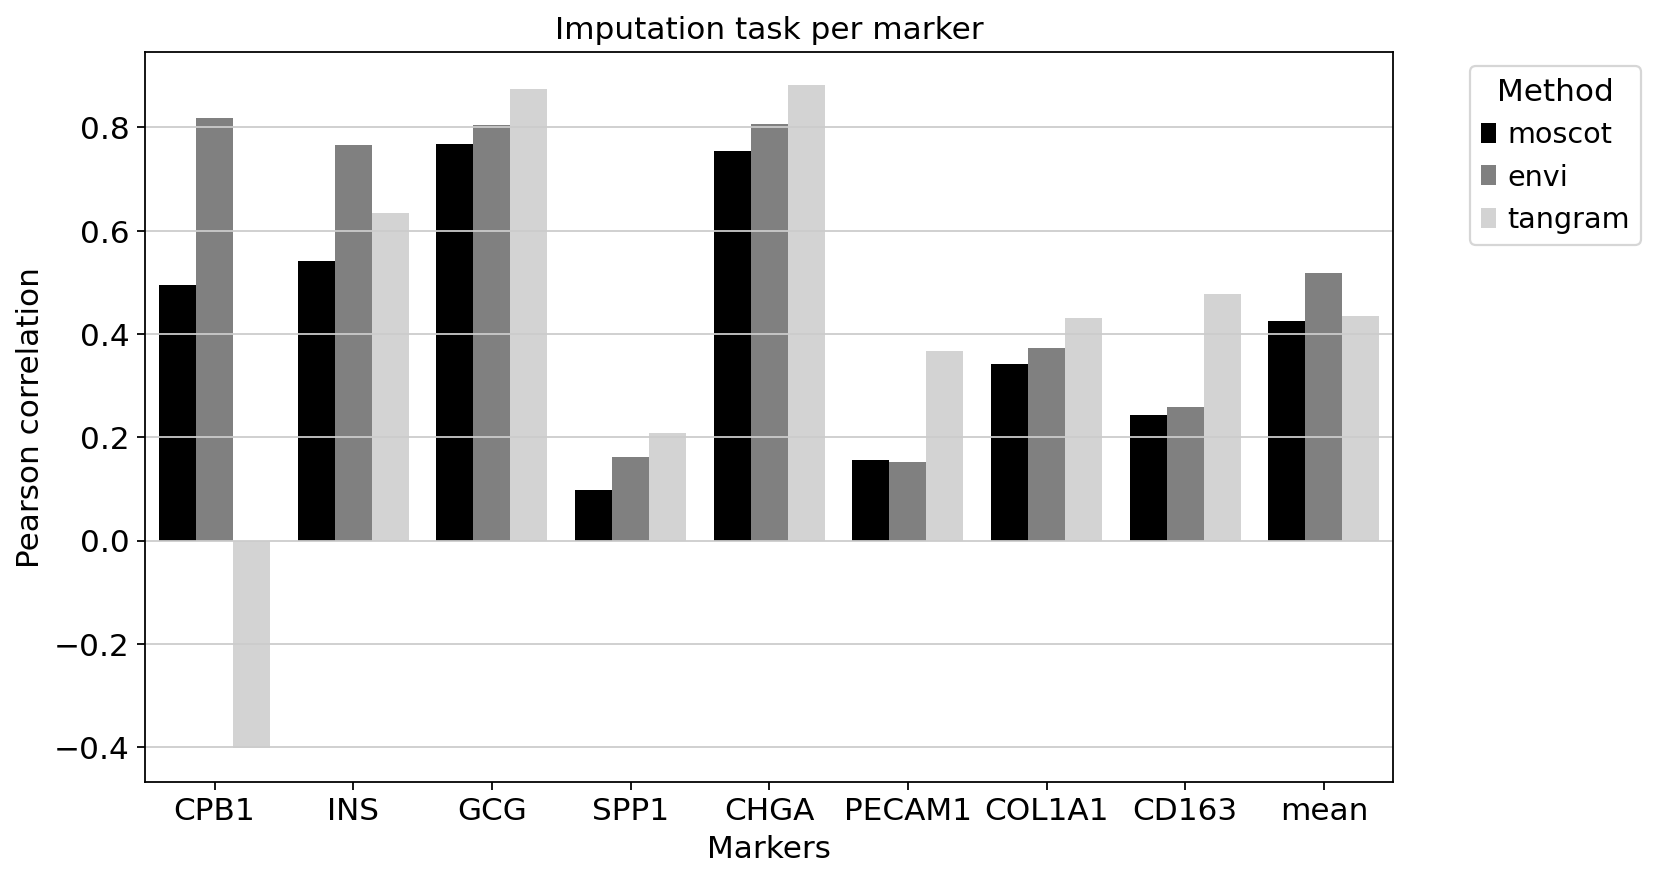

In [121]:
# Reshape the DataFrame to long format
df_melted = pd.melt(df, id_vars=['gene'], 
                    var_name='Method', value_name='Pearson correlation')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='gene', y='Pearson correlation', hue='Method',
            palette={"moscot": "black", "envi":"gray","tangram": "lightgray"})

# Add title and labels
plt.title('Imputation task per marker')
plt.xlabel('Markers')
plt.ylabel('Pearson correlation')
# Place the legend outside the plot
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')


# Display the plot
plt.show()

In [122]:
df = df.T
df.columns = ['CPB1', 'INS', 'GCG', 'SPP1', 'CHGA', 'PECAM1', 'COL1A1', 'CD163','mean']
df = df.drop('gene',axis=0)
df = df.reset_index()
df

index      CPB1       INS       GCG      SPP1      CHGA    PECAM1  \
0   moscot  0.494068  0.541787  0.767429  0.097586  0.754787  0.156508   
1     envi  0.818959  0.766712  0.805184  0.161521  0.806358  0.152208   
2  tangram -0.402176  0.633478  0.875041  0.207506  0.881707   0.36767   

     COL1A1     CD163      mean  
0  0.342394  0.243693  0.424782  
1  0.372884  0.259476  0.517913  
2   0.43091  0.477631  0.433971

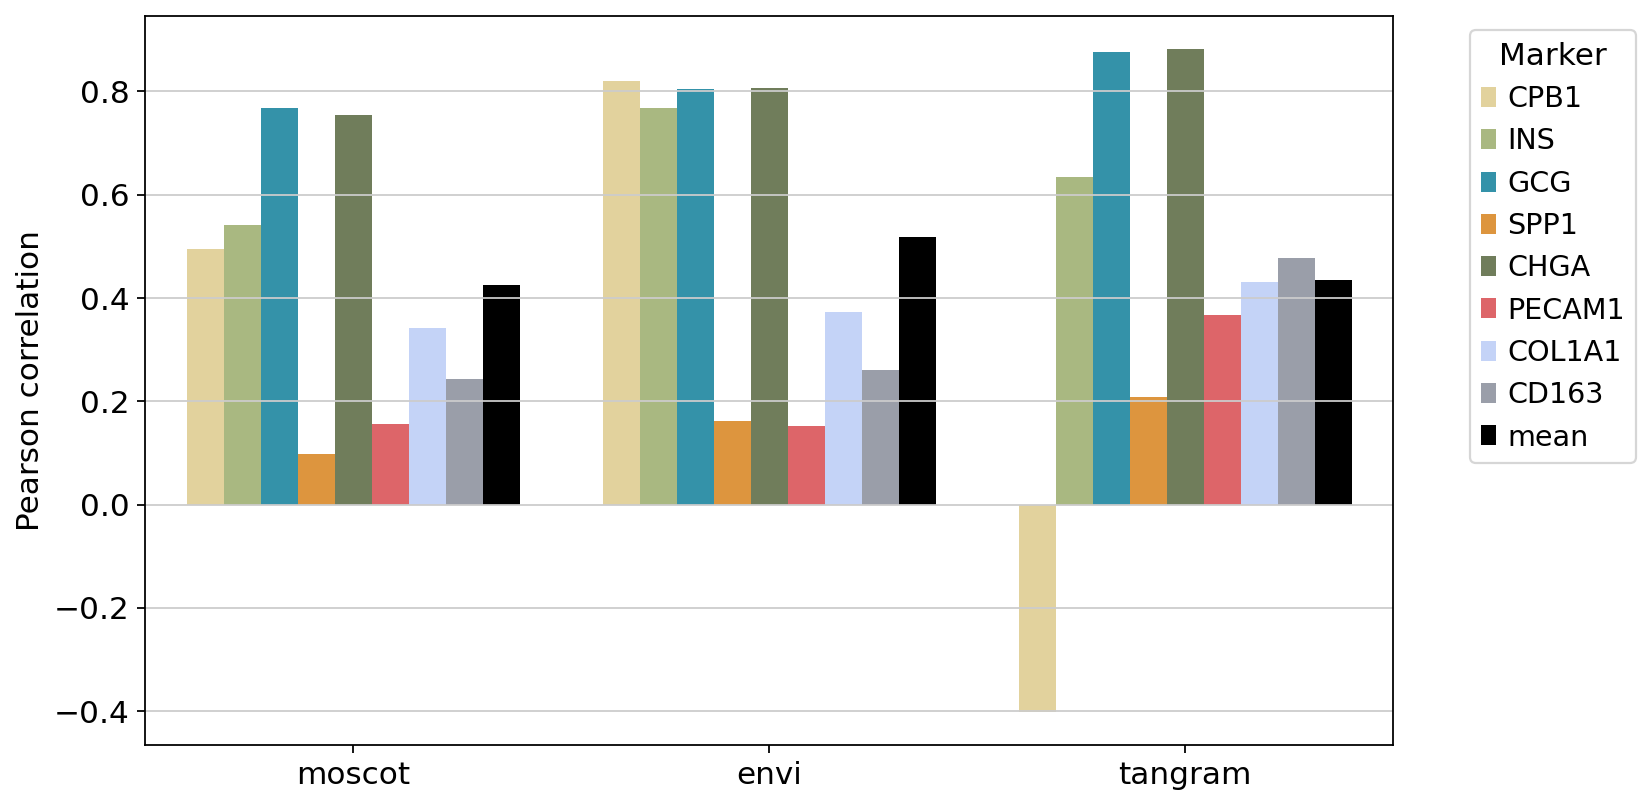

In [125]:
# Reshape the DataFrame to long format
df_melted = pd.melt(df, id_vars=['index'], 
                    var_name='Marker', value_name='Pearson correlation')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='index', y='Pearson correlation', hue='Marker',
            palette={"CPB1": "#edd892",
                    "INS": "#adc178",
                    "GCG":"#219ebc",
                    "SPP1":"#f79824",
                    "CHGA":"#718355",
                    "PECAM1":"#f15156",
                    "COL1A1":"#bbd0ff",
                    "CD163":"#979dac",
                    "mean":"black"})
# Add title and labels
plt.title('')
plt.xlabel('')
plt.ylabel('Pearson correlation')
# Place the legend outside the plot
plt.legend(title='Marker', bbox_to_anchor=(1.05, 1), loc='upper left')


# Display the plot
plt.show()

In [149]:
adata_sc = sc.read('../../../../spatial_pancreas_data/preprocessed_data/dissociated_nd_annotation_l0.h5ad')
adata_sc

/home/aih/sara.jimenez/miniconda3/envs/tangram/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 21453 × 23146
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'S_score', 'G2M_score', 'phase', 'cell_type_coarse'
    var: 'n_cells'
    uns: 'Sample_colors', 'cell_type_coarse_colors', 'cell_type_coarse_sizes', 'dendrogram_cell_type_coarse', 'leiden', 'log1p', 'neighbors', 'paga', 'phase_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts', 'soupX_counts'
    obsp: 'connectivities', 'distances'

In [127]:
adata = sc.read('../../../../../../datasets/projects/20230301_Sander_SpatialPancreas_sara.jimenez/spatial/S1_annotated_l0.h5ad')
adata

AnnData object with n_obs × n_vars = 108711 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'spatial'
    obsm: 'spatial', 'spatial_fov'
    layers: 'counts'

In [134]:
folder    = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
adata_imp = sc.read(filename = folder + 'imputed_envi.h5ad')

In [128]:
markers = ['CPB1', 'INS', 'GCG', 'SPP1', 'CHGA', 'PECAM1', 'COL1A1', 'CD163']

In [136]:
markers2plot = ['INS', 'GCG', 'CPB1','SOX9']

In [131]:
for marker in markers:
    sq.pl.spatial_segment(adata,color=marker,size=5,library_id='12',
                          library_key='fov', seg_cell_id='cell_ID',cmap='RdYlBu_r', img=False)

SyntaxError: keyword argument repeated: size (3686595321.py, line 2)

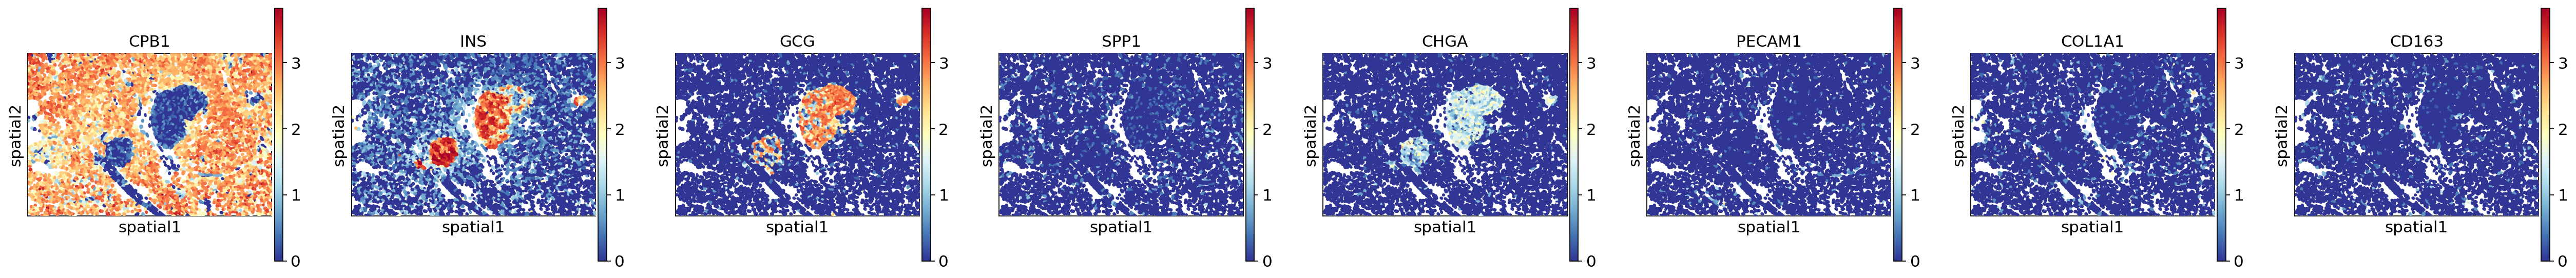

In [133]:
sq.pl.spatial_segment(adata,color=markers,size=5,library_id='12',ncols=8,
                          library_key='fov', seg_cell_id='cell_ID',cmap='RdYlBu_r', img=False)

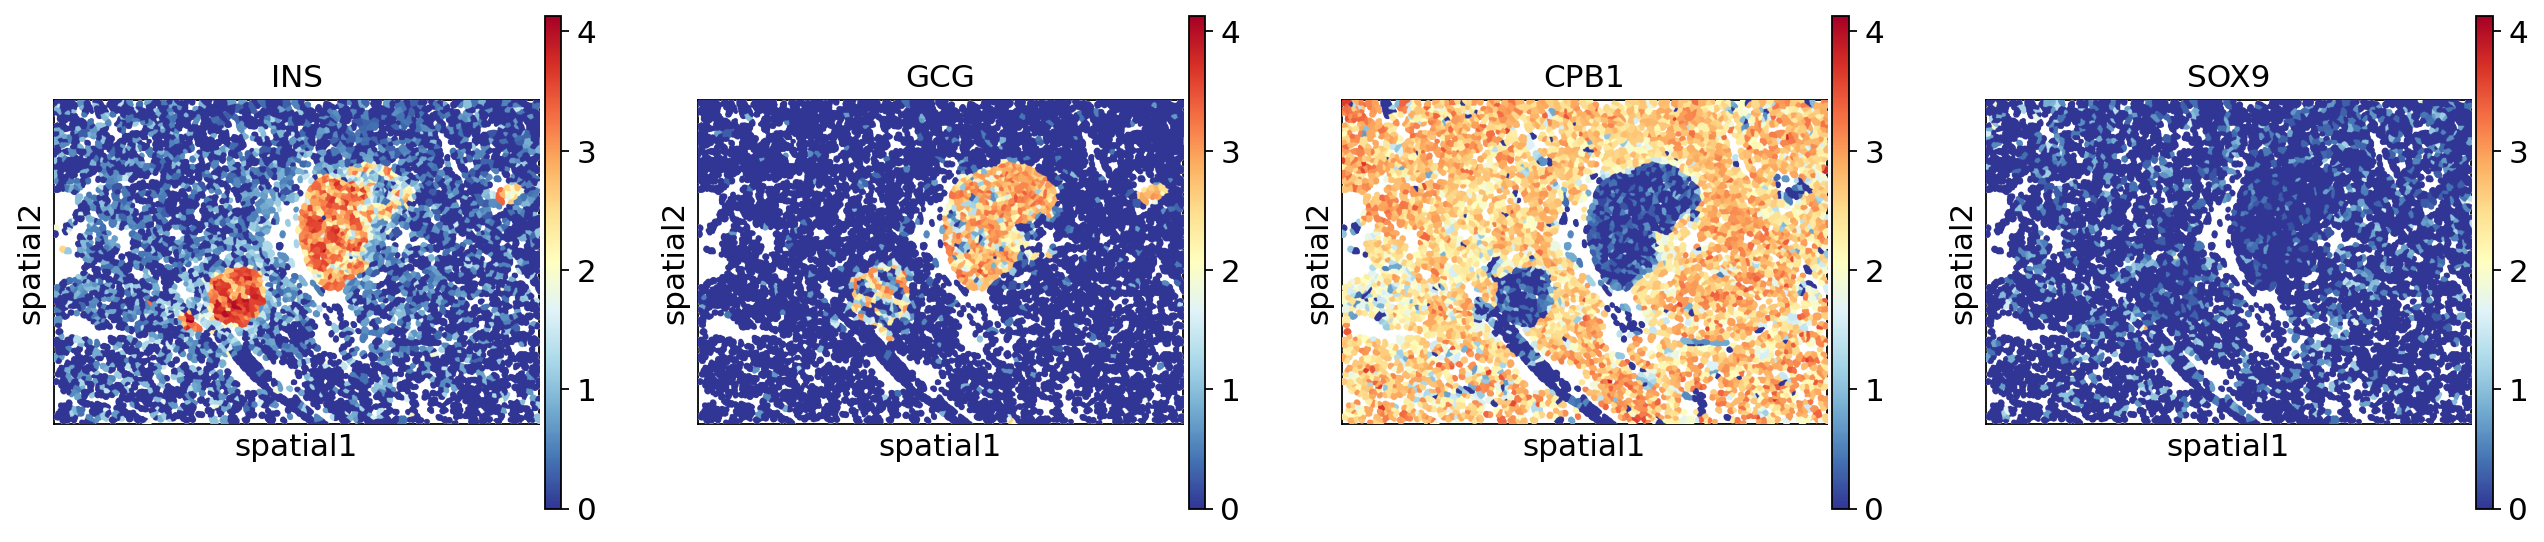

In [137]:
sq.pl.spatial_segment(adata,color=markers2plot,size=5,library_id='12',ncols=8,
                          library_key='fov', seg_cell_id='cell_ID',cmap='RdYlBu_r', img=False)

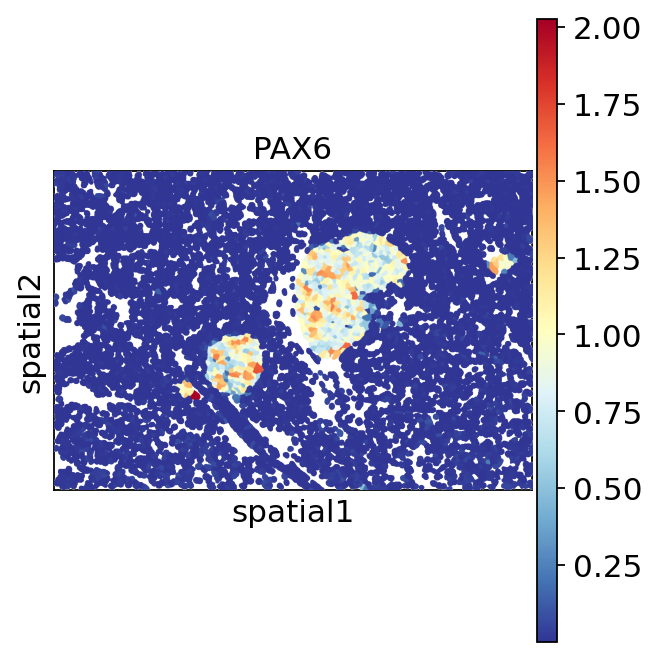

In [148]:
TFs = ['cell_type','MUC5B','PAX6','NKX2-2']
sq.pl.spatial_segment(adata_imp,color='PAX6',size=5,library_id='12',ncols=1,
                          library_key='fov', seg_cell_id='cell_ID',cmap='RdYlBu_r', img=False)

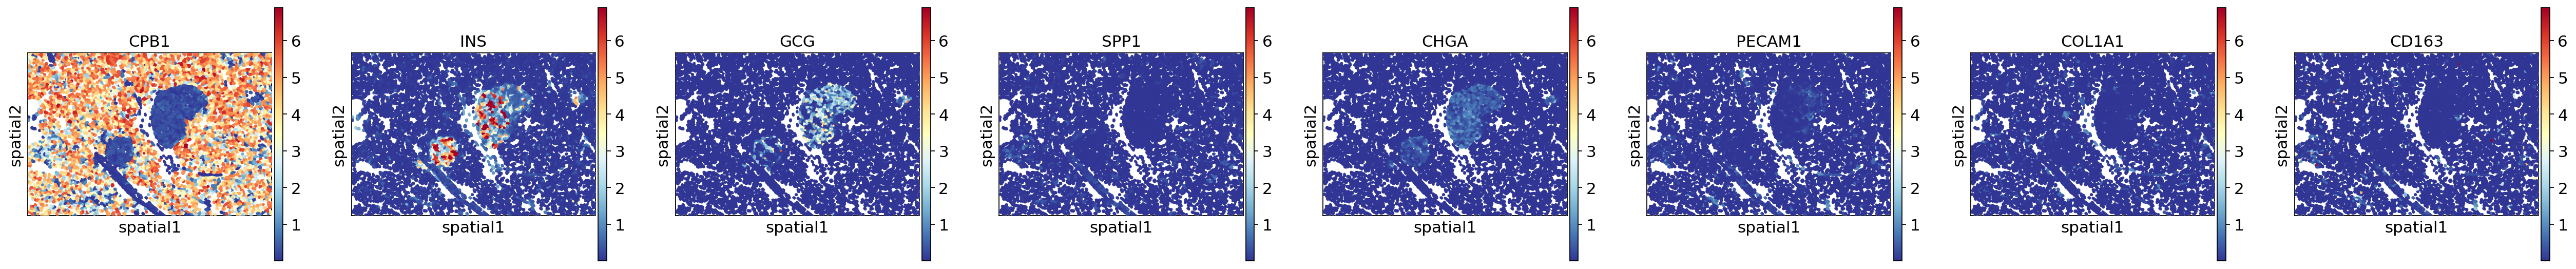

In [135]:
sq.pl.spatial_segment(adata_imp,color=markers,size=5,library_id='12',ncols=8,
                          library_key='fov', seg_cell_id='cell_ID',cmap='RdYlBu_r', img=False)

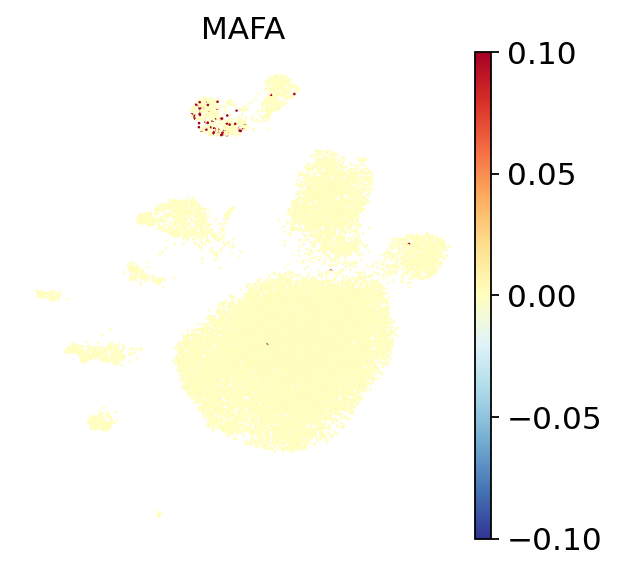

In [151]:
sc.pl.umap(adata_sc, color='MAFA',vmin=0,
        vmax="p99",  # set vmax to the 99th percentile of the gene count instead of the maximum, to prevent outliers from making expression in other cells invisible. Note that this can cause problems for extremely lowly expressed genes.
        sort_order=False,  # do not plot highest expression on top, to not get a biased view of the mean expression among cells
        frameon=False,cmap='RdYlBu_r')